# Linear Regression Using Tensorflow and Sklearn

In [1]:
#Imports for tensorflow linear regression

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import tensorflow.compat.v2.feature_column as fc
import random

In [2]:
#Loading the dataset

train_set = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
test_set = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/eval.csv")

#Seperating Features and Labels

train_label_set = train_set.pop("survived")
test_label_set = test_set.pop("survived")

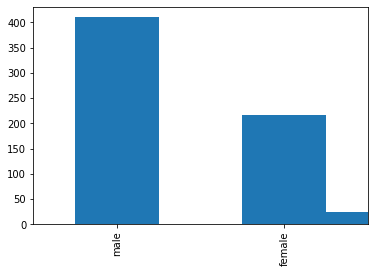

In [3]:
#Inference from data

train_set.describe() #describes the data
train_set["age"].hist(bins=20) #Gives a histogram representation
train_set["sex"].value_counts().plot(kind="bar") #Counts the total number of men and women and plots them ,barh = barchart along horizontal axis

# PreProcessing of data

### the content of columns should be encoded with numerical values before using it for training

In [5]:
categorical = ["sex","n_siblings_spouses","parch","class","deck","embark_town","alone"] #catogorical column are those columns whose data are repeated lke male or female
numerical = ["age","fare"] #they mostly have unique and random values
feature_columns=[]

for feature_name in categorical:
    vocabulary = train_set[feature_name].unique() #returns unique values in the given column
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name,vocabulary))

for feature_name in numerical:
    feature_columns.append(tf.feature_column.numeric_column(feature_name,dtype=tf.float32))

#feature columns that is going to be passed should be a list of tf.feature_columns objects either categorical columns or numerical columns data object 
    
print(feature_columns[0])    

VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0)


In [6]:
#the input for tf.estimator.LinearClassifier or LinearRegression model should be a function which returns a tf.data.Dataset object

def make_input_fn(feature_df,label_df,shuffle = True,num_of_epochs=10,batch_size=32):
    def input_fn():
        ds = tf.data.Dataset.from_tensor_slices((dict(feature_df),label_df))
        if shuffle:
            ds.shuffle(1000)
        ds = ds.batch(batch_size).repeat(num_of_epochs)
        return ds
    return input_fn

train_input_fn = make_input_fn(train_set,train_label_set)
test_input_set = make_input_fn(test_set,test_label_set)

In [7]:
#loading the tensorflow linear regression model
linear_regression_model = tf.estimator.LinearClassifier(feature_columns = feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\admin\\AppData\\Local\\Temp\\tmp0lc7v2ao', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E6AD9D0C08>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [8]:
#Training the model 
linear_regression_model.train(train_input_fn)

#testing the model
result = linear_regression_model.evaluate(test_input_set)

print(result)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
I

In [9]:
print(result["accuracy"])

0.7613636


In [10]:
#Predicting

predicted = list(linear_regression_model.predict(test_input_set))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\admin\AppData\Local\Temp\tmp0lc7v2ao\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


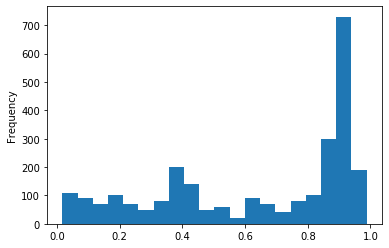

In [11]:
probs = pd.Series([pred["probabilities"][0] for pred in predicted])
probs.plot(kind="hist",bins=20)

# Linear Regression Implementation using Sklearn

In [13]:
#implementing linear regression using scikit_learn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder

In [14]:

x_train,x_test,y_train,y_test = train_test_split(train_set,train_label_set,test_size=0.3,random_state=101)

#for encoding the test data
oc = OrdinalEncoder()

#dictionary for mapping the unique value to numeric values
sex = {"male":1,"female":0}
classy = {'First':0,"Second":1,"Third":2}
decky = {'unknown':0 ,'D':1 ,'E':2 ,'B':3 ,'C':4 ,'A':5 ,'F':6 ,'G':7}
embark_town = {'Queenstown':0,'Southampton':1,'Cherbourg':2}
alone={"y":0,"n":1}

x_train["sex"] = x_train["sex"].map(sex)
x_train["class"] = x_train["class"].map(classy)
x_train["deck"] = x_train["deck"].map(decky)
x_train["embark_town"] = x_train["embark_town"].map(embark_town)
x_train["alone"] = x_train["alone"].map(alone)

x_train = x_train.drop(columns=['n_siblings_spouses','parch'])#Dropping the useless feature

print(x_train.head())

     sex   age     fare  class  deck  embark_town  alone
308    1  28.0   7.7500      2     0            0      0
437    1  28.0   7.0500      2     0            1      0
156    1  22.0   7.2500      2     0            1      0
375    1  28.0   7.2292      2     0            2      0
161    1  30.0  10.5000      1     0            1      0


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

In [15]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train,y_train)#fitting the linear regression line according to the given training dataset

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)#changing the parameters to improve performances

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [17]:
linear_reg_model.coef_ #getting the m and c value for the line

array([-5.63259954e-01, -2.59678377e-03,  3.42043855e-05, -1.28198019e-01,
        1.18753139e-02,  5.43163465e-02,  4.57303606e-03])

In [18]:
#Predicting
from sklearn.metrics import accuracy_score

#mapping the test side(encoding)
test_set["sex"] = test_set["sex"].map(sex)
test_set["class"] = test_set["class"].map(classy)
test_set["deck"] = test_set["deck"].map(decky)
test_set["embark_town"] = test_set["embark_town"].map(embark_town)
test_set["alone"] = test_set["alone"].map(alone)

In [31]:
def activation_fn(f):
    if 1 > f > 0.5:
        return 1
    elif f < 0.5 :
        return 0;
    else:
        return "error"

In [34]:
print(test_set)
predicted_label = linear_reg_model.predict(test_set.head())
print(predicted_label)
print(test_label_set.head())
print(test_set.head())
print(list(map(activation_fn,predicted_label)))
accuracy = accuracy_score(list(map(activation_fn,predicted_label)),test_label_set.head())
print(accuracy)

     sex   age     fare  class  deck  embark_town  alone
0      1  35.0   8.0500      2     0          1.0      0
1      1  54.0  51.8625      0     2          1.0      0
2      0  58.0  26.5500      0     4          1.0      0
3      0  55.0  16.0000      1     0          1.0      0
4      1  34.0  13.0000      1     1          1.0      0
..   ...   ...      ...    ...   ...          ...    ...
259    0  25.0  26.0000      1     0          1.0      1
260    1  33.0   7.8958      2     0          1.0      0
261    0  39.0  29.1250      2     0          0.0      1
262    1  27.0  13.0000      1     0          1.0      0
263    1  26.0  30.0000      0     4          2.0      0

[264 rows x 7 columns]
[0.07683089 0.30913724 0.88489489 0.71662511 0.21967031]
0    0
1    0
2    1
3    1
4    1
Name: survived, dtype: int64
   sex   age     fare  class  deck  embark_town  alone
0    1  35.0   8.0500      2     0          1.0      0
1    1  54.0  51.8625      0     2          1.0      0
2    0